<a href="https://colab.research.google.com/github/gabena98/ML_project/blob/main/Copia_di_ml_project_unipi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [6]:
# load the dataset
monks_1_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_1_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_test_hot.csv', 
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])

In [ ]:
monks_1_train

,y,x1_1,x1_2,x1_3,x2_1,x2_2,x2_3,x3_1,x3_2,x4_1,x4_2,x4_3,x5_1,x5_2,x5_3,x5_4,x6_1,x6_2
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
121,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
122,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# **Nuovo input**

In [35]:
X_1_tr = monks_1_train.iloc[:,1:].values
y_1_tr = monks_1_train.iloc[:,0].values

X_2_tr = monks_2_train.iloc[:,1:].values
y_2_tr = monks_2_train.iloc[:,0].values

X_3_tr = monks_3_train.iloc[:,1:].values
y_3_tr = monks_3_train.iloc[:,0].values

X_test_1 = monks_1_test.iloc[:,1:].values
y_test_1 = monks_1_test.iloc[:,0].values

X_test_2 = monks_2_test.iloc[:,1:].values
y_test_2 = monks_2_test.iloc[:,0].values

X_test_3 = monks_3_test.iloc[:,1:].values
y_test_3 = monks_3_test.iloc[:,0].values

# **MONK 1**

In [92]:
...
# define the keras model for monk 1
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(X_1_tr.shape[1],), activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [93]:
...
# compile the keras model
model_1.summary()
opt = tf.keras.optimizers.experimental.SGD(0.02, momentum=0.09)
model_1.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 72        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [94]:
%%time
# fit the keras model on the dataset
history = model_1.fit(X_1_tr, y_1_tr,validation_data=(X_test_1,y_test_1) ,epochs=150, batch_size=1)
...

Epoch 1/150
124/124 [==============================] - 1s 6ms/step - loss: 0.2441 - accuracy: 0.5484 - val_loss: 0.2471 - val_accuracy: 0.5741
Epoch 2/150
124/124 [==============================] - 1s 6ms/step - loss: 0.2385 - accuracy: 0.6210 - val_loss: 0.2428 - val_accuracy: 0.5810
Epoch 3/150
124/124 [==============================] - 1s 5ms/step - loss: 0.2319 - accuracy: 0.6371 - val_loss: 0.2382 - val_accuracy: 0.5949
Epoch 4/150
124/124 [==============================] - 1s 7ms/step - loss: 0.2243 - accuracy: 0.6452 - val_loss: 0.2324 - val_accuracy: 0.6157
Epoch 5/150
124/124 [==============================] - 1s 7ms/step - loss: 0.2154 - accuracy: 0.7016 - val_loss: 0.2254 - val_accuracy: 0.6389
Epoch 6/150
124/124 [==============================] - 1s 5ms/step - loss: 0.2036 - accuracy: 0.7097 - val_loss: 0.2177 - val_accuracy: 0.6505
Epoch 7/150
124/124 [==============================] - 1s 6ms/step - loss: 0.1910 - accuracy: 0.7419 - val_loss: 0.2082 - val_accuracy: 0.6759

Ellipsis

In [16]:
...
# evaluate the keras model
_, accuracy = model_1.evaluate(X_test_1, y_test_1, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9653
Accuracy: 96.53


Train: 1.0000 Test: 1.0000


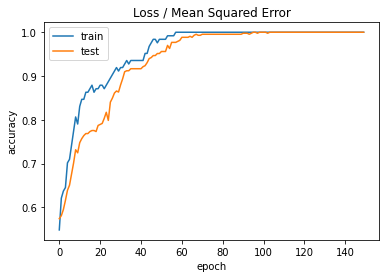

In [95]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_1.evaluate(X_1_tr, y_1_tr, verbose=0)
_, test_mse = model_1.evaluate(X_test_1,y_test_1,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

# **MONK 2**

In [87]:
...
# define the keras model for monk 2
model_2 = Sequential()
model_2.add(Dense(4, input_shape=(X_test_2.shape[1],), activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [88]:
...
# compile the keras model
model_2.summary()
opt = tf.keras.optimizers.experimental.SGD(learning_rate = 0.05, momentum=0.09)
model_2.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [89]:
%%time
# fit the keras model on the dataset
history = model_2.fit(X_2_tr, y_2_tr,validation_data=(X_test_2,y_test_2) , epochs=150, batch_size=1)
...

Epoch 1/150
169/169 [==============================] - 1s 6ms/step - loss: 0.2454 - accuracy: 0.6154 - val_loss: 0.2271 - val_accuracy: 0.6736
Epoch 2/150
169/169 [==============================] - 1s 6ms/step - loss: 0.2390 - accuracy: 0.6095 - val_loss: 0.2242 - val_accuracy: 0.6782
Epoch 3/150
169/169 [==============================] - 1s 5ms/step - loss: 0.2339 - accuracy: 0.6213 - val_loss: 0.2220 - val_accuracy: 0.6782
Epoch 4/150
169/169 [==============================] - 1s 4ms/step - loss: 0.2291 - accuracy: 0.6627 - val_loss: 0.2161 - val_accuracy: 0.6736
Epoch 5/150
169/169 [==============================] - 1s 5ms/step - loss: 0.2236 - accuracy: 0.6272 - val_loss: 0.2134 - val_accuracy: 0.6875
Epoch 6/150
169/169 [==============================] - 1s 5ms/step - loss: 0.2155 - accuracy: 0.6509 - val_loss: 0.2077 - val_accuracy: 0.6898
Epoch 7/150
169/169 [==============================] - 1s 5ms/step - loss: 0.2057 - accuracy: 0.6509 - val_loss: 0.1992 - val_accuracy: 0.6875

Ellipsis

In [90]:
...
# evaluate the keras model
_, accuracy = model_2.evaluate(X_test_2, y_test_2, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 5.1056e-04 - accuracy: 1.0000
Accuracy: 100.00


Train: 1.0000 Test: 1.0000


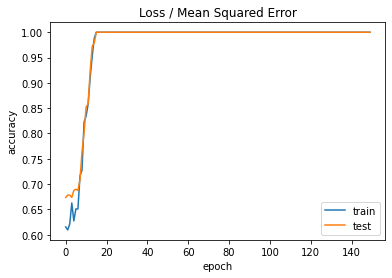

In [91]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_2.evaluate(X_2_tr, y_2_tr, verbose=0)
_, test_mse = model_2.evaluate(X_test_2,y_test_2,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

# **MONK 3**

In [107]:
...
# define the keras model for monk 3
model_3 = Sequential()
model_3.add(Dense(6, input_shape=(X_test_3.shape[1],), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [108]:
...
# compile the keras model
model_3.summary()
opt = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum=0.5)
model_3.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 108       
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [109]:
%%time
# fit the keras model on the dataset
history = model_3.fit(X_3_tr, y_3_tr,validation_data=(X_test_3,y_test_3) ,epochs=100, batch_size=1)
...

Epoch 1/100
122/122 [==============================] - 2s 7ms/step - loss: 0.1848 - accuracy: 0.7213 - val_loss: 0.0678 - val_accuracy: 0.9653
Epoch 2/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0694 - accuracy: 0.9262 - val_loss: 0.0393 - val_accuracy: 0.9722
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0555 - accuracy: 0.9426 - val_loss: 0.0349 - val_accuracy: 0.9722
Epoch 4/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0568 - accuracy: 0.9262 - val_loss: 0.0312 - val_accuracy: 0.9699
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0532 - accuracy: 0.9426 - val_loss: 0.0245 - val_accuracy: 0.9722
Epoch 6/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0509 - accuracy: 0.9262 - val_loss: 0.0330 - val_accuracy: 0.9630
Epoch 7/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0491 - accuracy: 0.9426 - val_loss: 0.0218 - val_accuracy: 0.9769

Ellipsis

In [99]:
...
# evaluate the keras model
_, accuracy = model_3.evaluate(X_test_3, y_test_3, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9630
Accuracy: 96.30


Train: 0.9918 Test: 0.9560


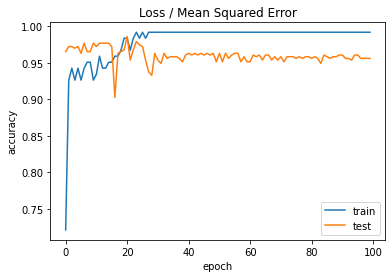

In [110]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_3.evaluate(X_3_tr, y_3_tr, verbose=0)
_, test_mse = model_3.evaluate(X_test_3,y_test_3,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()